C:\Users\J\AppData\Local\Temp\ipykernel_3724\3585666537.py:43: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(211, polar=True)


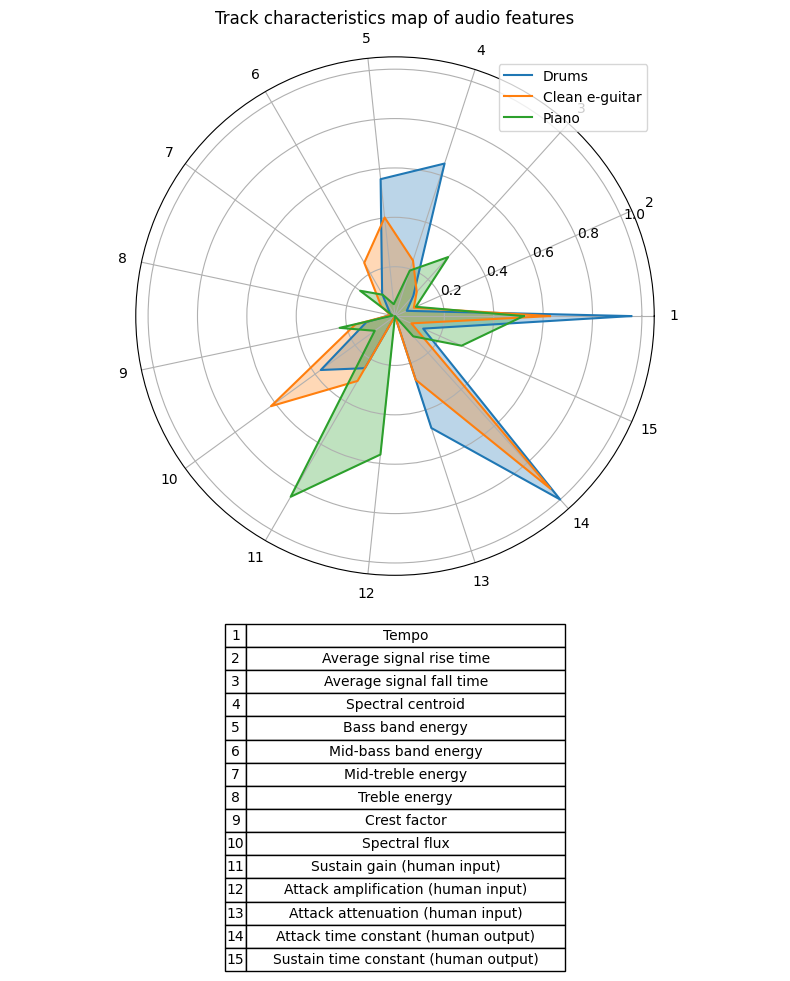

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from os.path import join

# Load data from JSON files
with open(join("dataset", "saved", "AITD_Dataset_Kristof_beta_1in.json"), "r") as json_file:
    input_data = json.load(json_file)
with open(join("dataset", "saved", "AITD_Dataset_Kristof_beta_1out.json"), "r") as json_file:
    output_data = json.load(json_file)

# Combine input and output data
data = {key: input_data[key] + output_data[key] for key in input_data.keys()}
df = pd.DataFrame.from_dict(data).T
df = df.sort_index()
df.columns = ["TEMPO",
              "T1A", 
              "T2A", 
              "CENTROID", 
              "L", 
              "ML", 
              "MH", 
              "H", 
              "CREST",
              "FLUX",
              "SUSTAIN_GAIN",
              "ATTACK_CUT",
              "ATTACK_BOOST",
              "ATTACK_T1",
              "SUSTAIN_T1"]

# Define targets and labels
targets = [
    #"1 4397-spicy-drums",
    "2 x-808-x-percs-kb",
    "8 est-clean-guitar",
    "58 A Minor, BWV 989"]
labels = ["Drums", "Clean e-guitar", "Piano"]

# Create the radar plot
fig, (ax, ax_table) = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [4, 1]})
ax = plt.subplot(211, polar=True)

# Plot each subset separately
for target, label in zip(targets, labels):
    subset_df = df[df.index.str.startswith(str(target))]
    categories = subset_df.columns.tolist()
    data = subset_df.values[0]  # Selecting the first row of the subset for plotting
    
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    data = np.concatenate((data, [data[0]]))
    angles += angles[:1]

    ax.plot(angles, data, label=label)
    ax.fill(angles, data, alpha=0.3)  # Fill the inner part with semi-transparent color

# Set tick labels to DataFrame index
ax.set_xticks(angles[:-1])
ax.set_xticklabels(range(1, len(df.columns) + 1))

plt.legend()
plt.title('Track characteristics map of audio features')

# Add table below the plot to explain the columns
column_descriptions = [
    "Tempo",
    "Average signal rise time", 
    "Average signal fall time", 
    "Spectral centroid", 
    "Bass band energy", 
    "Mid-bass band energy", 
    "Mid-treble energy", 
    "Treble energy", 
    "Crest factor",
    "Spectral flux",
    "Sustain gain (human input)",
    "Attack amplification (human input)",
    "Attack attenuation (human input)",
    "Attack time constant (human output)",
    "Sustain time constant (human output)"
]

table_data = [[i+1, col] for i, col in enumerate(column_descriptions)]

ax_table.axis('tight')
ax_table.axis('off')

# Create the table and set the column widths
table = ax_table.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')
table.auto_set_column_width([0, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
# table.columns[0].set_width(0.1)  # Make the first column narrower

plt.tight_layout()
plt.show()
